# Oil Spill Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d sudhanshu2198/oil-spill-detection

Dataset URL: https://www.kaggle.com/datasets/sudhanshu2198/oil-spill-detection
License(s): CC0-1.0
100%|███████████████████████████████████████| 77.5k/77.5k [00:00<00:00, 156kB/s]
100%|███████████████████████████████████████| 77.5k/77.5k [00:00<00:00, 156kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Oil Spill Classification/oil-spill-detection.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Oil Spill Classification')
zip_ref.close()

## Explrotary Data Analysis

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('oil_spill.csv')

In [6]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [7]:
df.shape

(937, 50)

In [8]:
df.size

46850

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
f_1,937.0,81.588047,6.497673e+01,1.00,31.00,64.00,124.00,352.00
f_2,937.0,332.842049,1.931939e+03,10.00,20.00,65.00,132.00,32389.00
f_3,937.0,698.707086,5.999656e+02,1.92,85.27,704.37,1223.48,1893.08
f_4,937.0,870.992209,5.227993e+02,1.00,444.20,761.28,1260.37,2724.57
f_5,937.0,84.121665,4.536177e+01,0.00,54.00,73.00,117.00,180.00
f_6,937.0,769696.378869,3.831151e+06,70312.00,125000.00,186300.00,330468.00,71315000.00
f_7,937.0,43.242721,1.271840e+01,21.24,33.65,39.97,52.42,82.64
f_8,937.0,9.127887,3.588878e+00,0.83,6.75,8.20,10.76,24.69
f_9,937.0,3940.712914,8.167428e+03,667.00,1371.00,2090.00,3435.00,160740.00
f_10,937.0,0.221003,9.031555e-02,0.02,0.16,0.20,0.26,0.74


In [11]:
df.isnull().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

f_1       238
f_2       297
f_3       927
f_4       933
f_5       179
f_6       375
f_7       820
f_8       618
f_9       561
f_10       57
f_11      577
f_12       59
f_13       73
f_14      107
f_15       53
f_16       91
f_17      893
f_18      810
f_19      170
f_20       53
f_21       68
f_22        9
f_23        1
f_24       92
f_25        9
f_26        8
f_27        9
f_28      308
f_29      447
f_30      392
f_31      107
f_32       42
f_33        4
f_34       45
f_35      141
f_36      110
f_37        3
f_38      758
f_39        9
f_40        9
f_41      388
f_42      220
f_43      644
f_44      649
f_45      499
f_46        2
f_47      937
f_48      169
f_49      286
target      2
dtype: int64

## Data Visualization

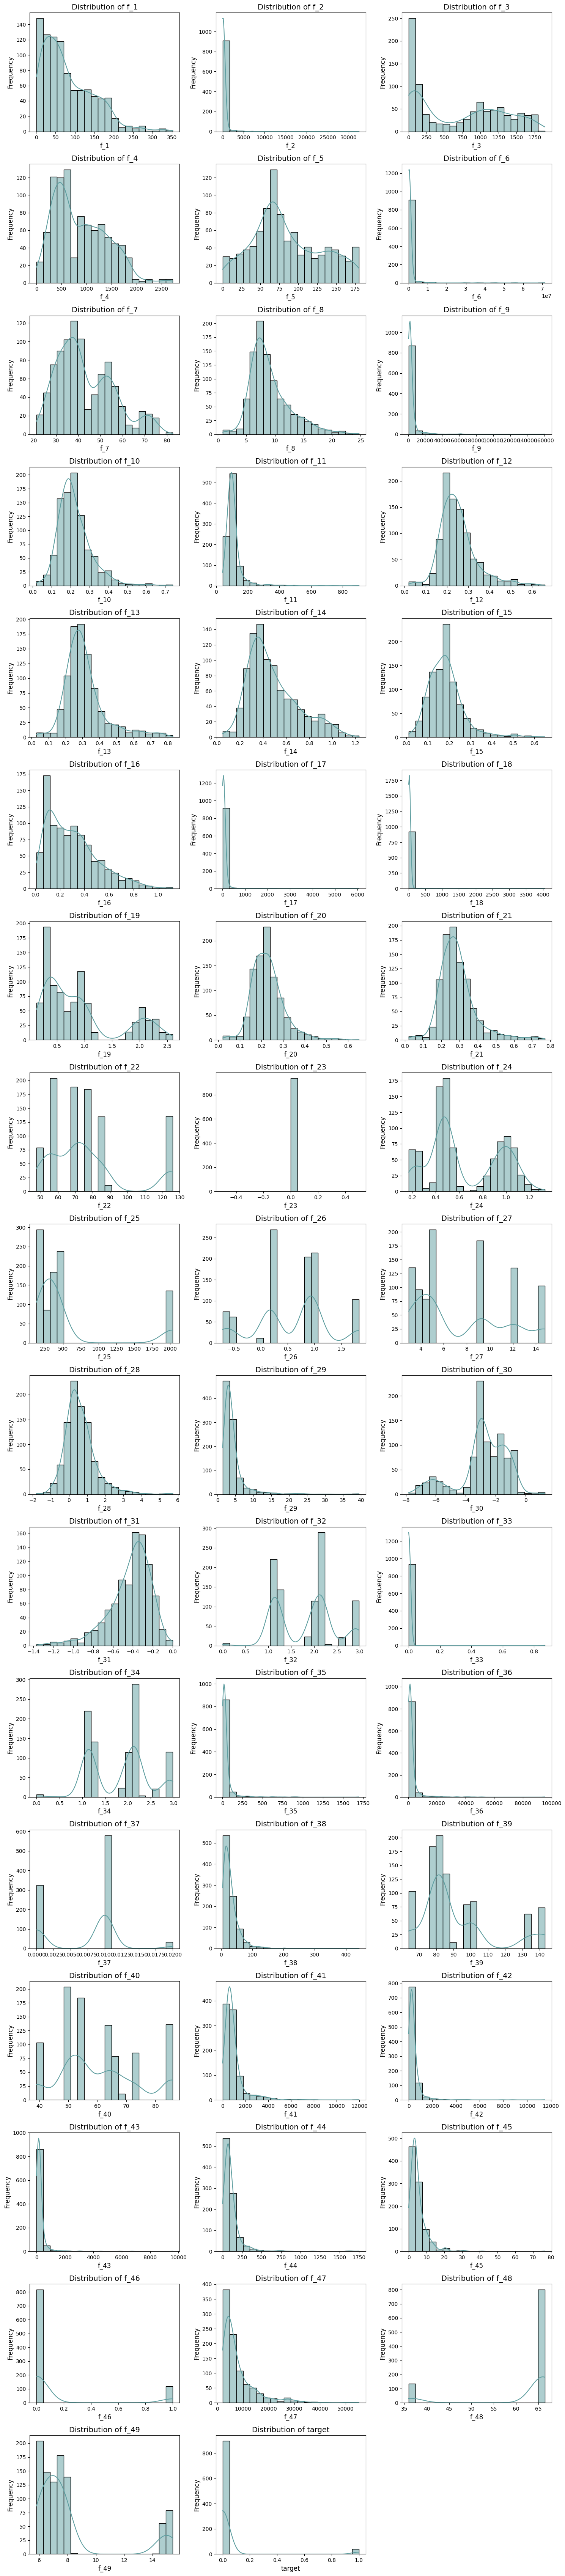

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True, axis=1)

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

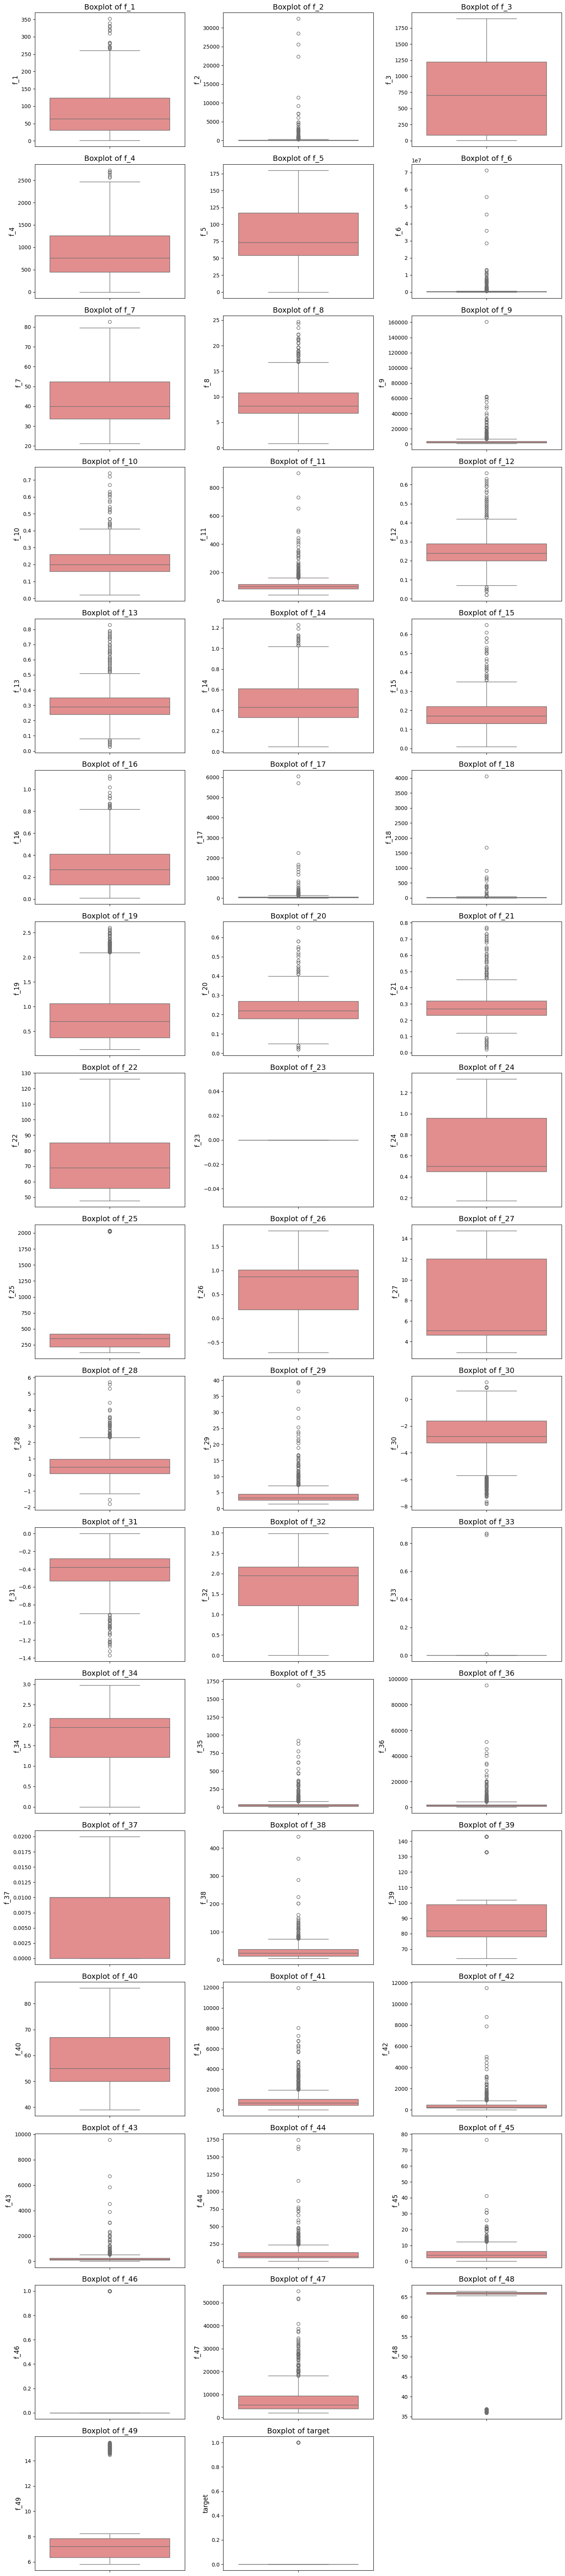

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

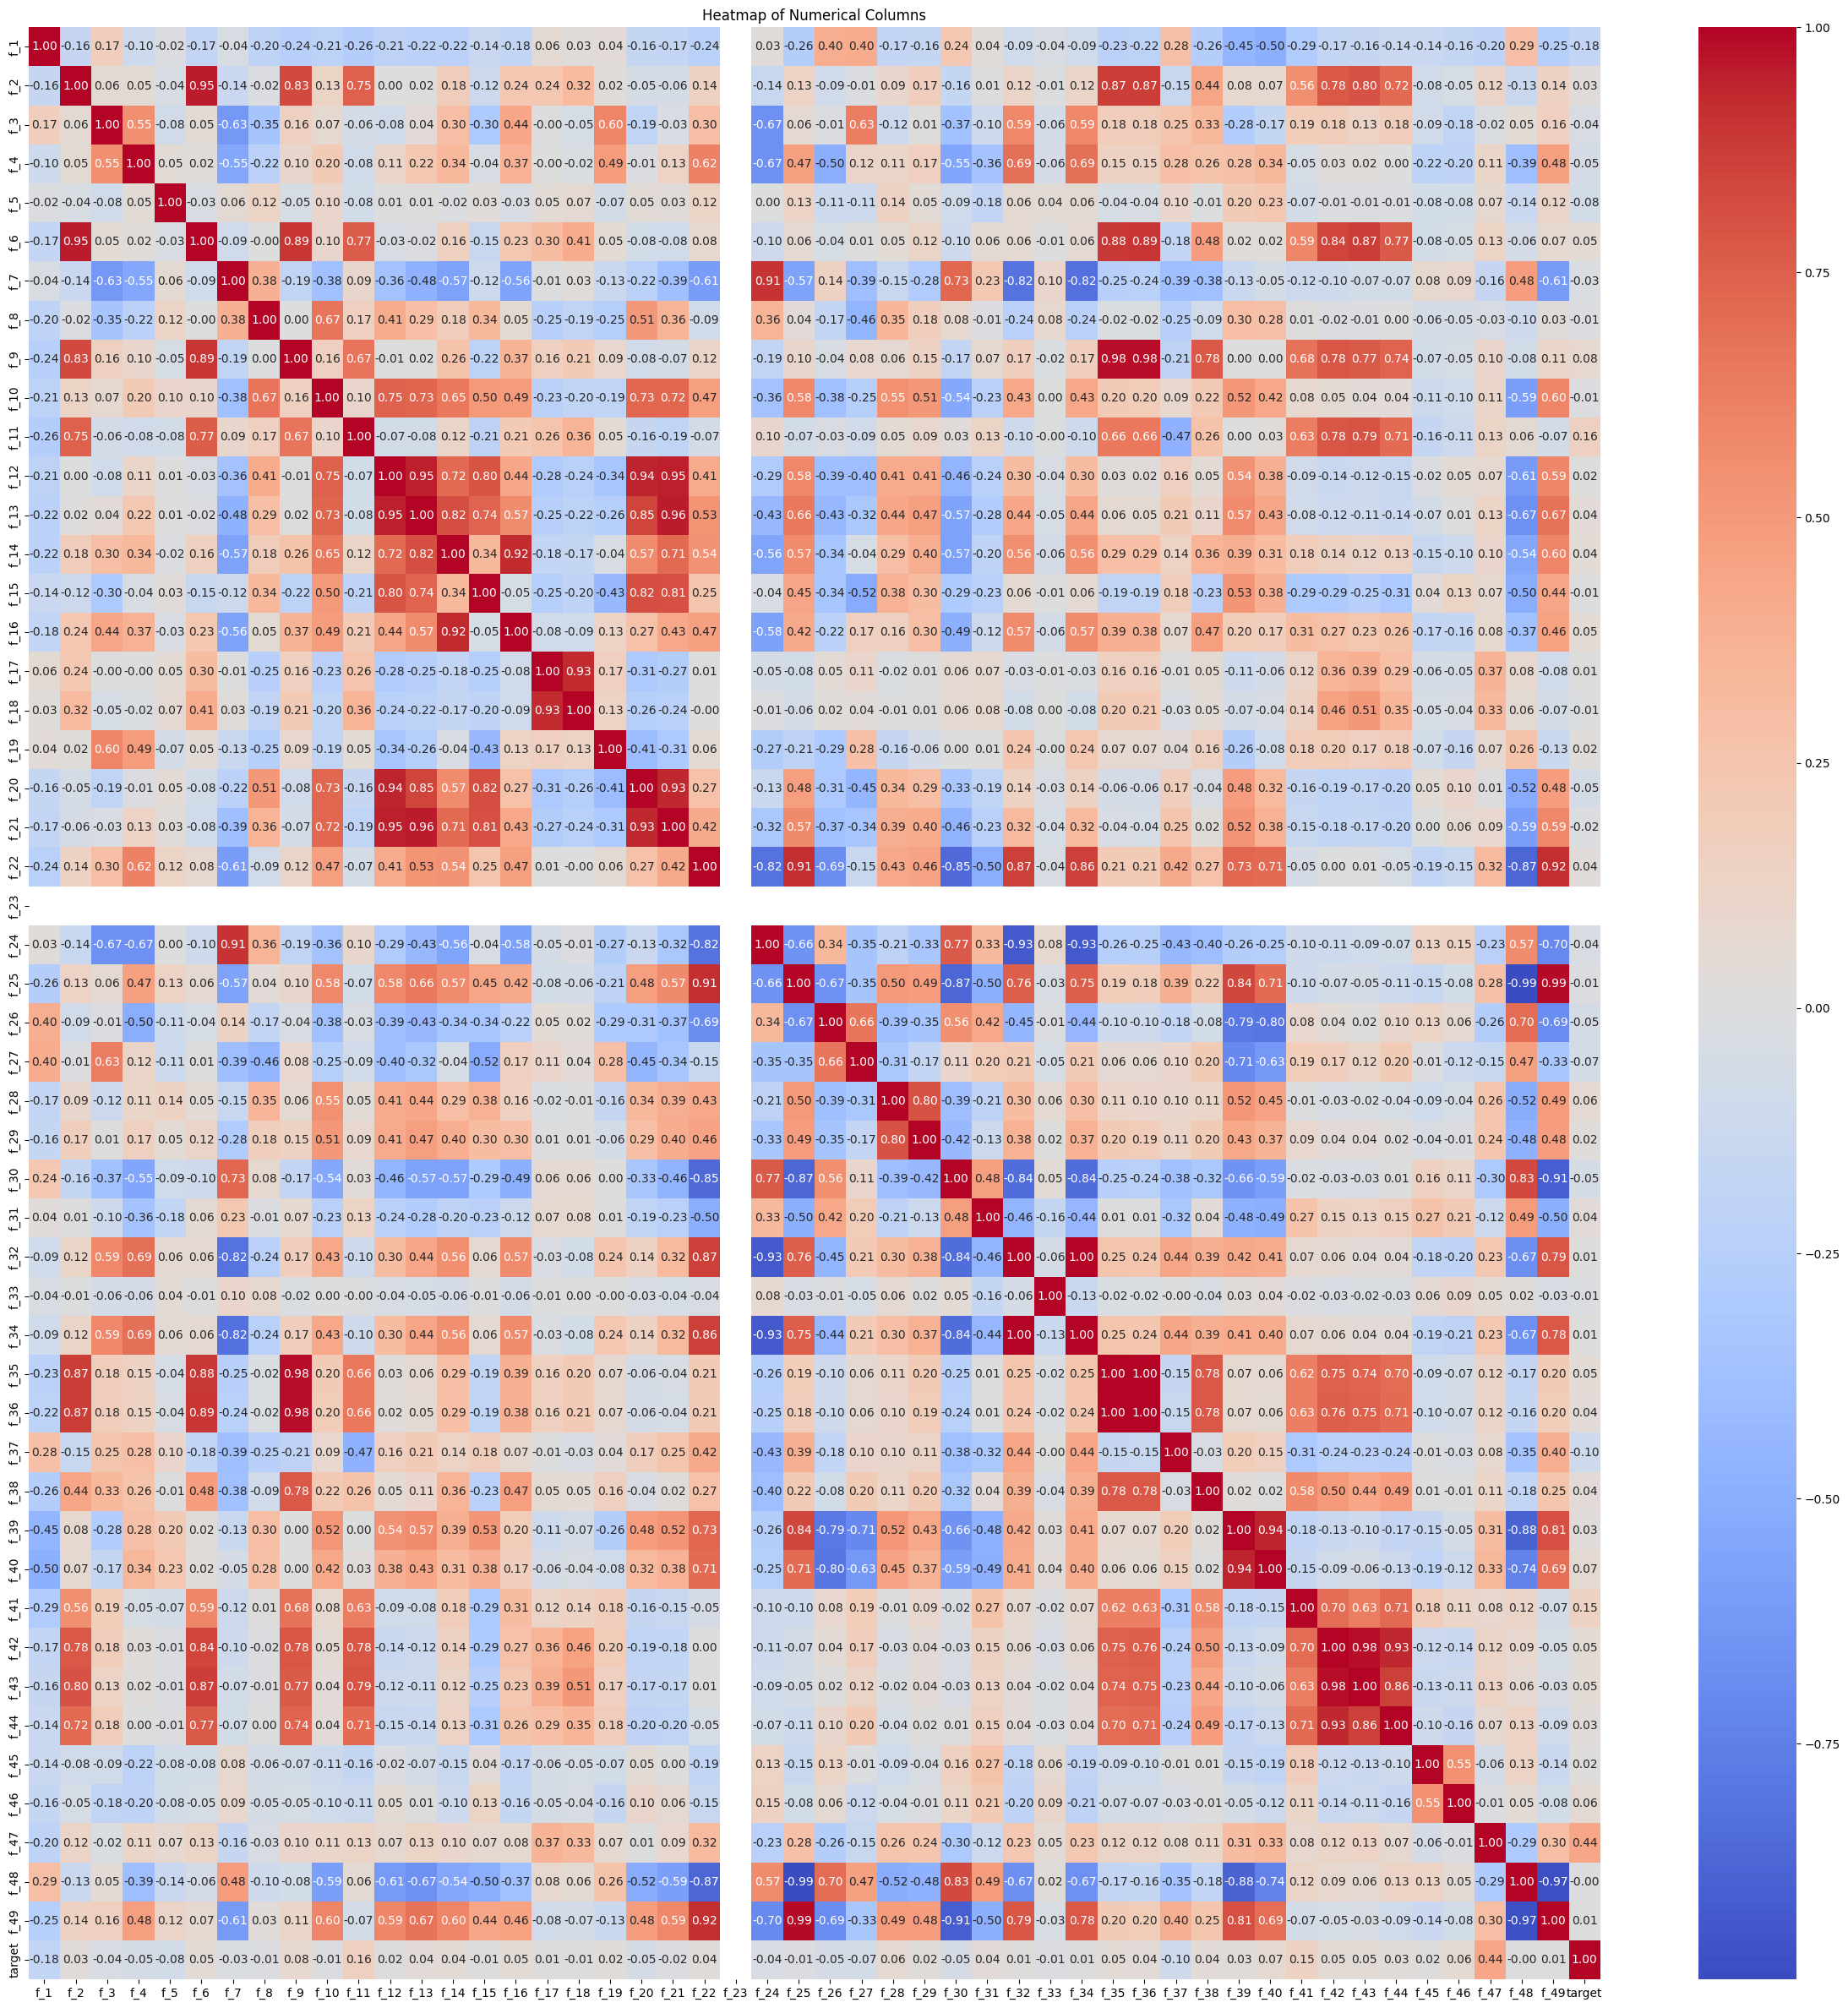

In [16]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(30, 30))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [38]:
# Dropping highly correlated features

def remove_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)
    return df_reduced, to_drop

df, dropped_columns = remove_highly_correlated_features(df, threshold=0.85)
print("Dropped Columns:", dropped_columns)


Dropped Columns: ['f_6', 'f_9', 'f_13', 'f_16', 'f_18', 'f_20', 'f_21', 'f_24', 'f_25', 'f_30', 'f_32', 'f_34', 'f_35', 'f_36', 'f_40', 'f_43', 'f_44', 'f_48', 'f_49']


In [40]:
X = df.drop(['target'],axis=1)
y = df['target']

In [41]:
# SMOTE

from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X,y = smt.fit_resample(X,y)

In [42]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [43]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [45]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.8904494382022472, 0.9466292134831461, 0.9887640449438202, 0.9915730337078652, 0.9691011235955056, 0.9859550561797753, 0.9803370786516854, 0.9578651685393258, 0.8764044943820225]


Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       174
           1       0.90      0.88      0.89       182

    accuracy                           0.89       356
   macro avg       0.89      0.89      0.89       356
weighted avg       0.89      0.89      0.89       356

Confusion Matrix:
 [[157  17]
 [ 22 160]]


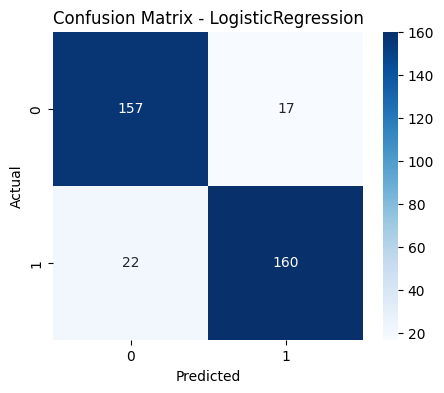

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       174
           1       0.94      0.96      0.95       182

    accuracy                           0.95       356
   macro avg       0.95      0.95      0.95       356
weighted avg       0.95      0.95      0.95       356

Confusion Matrix:
 [[162  12]
 [  7 175]]


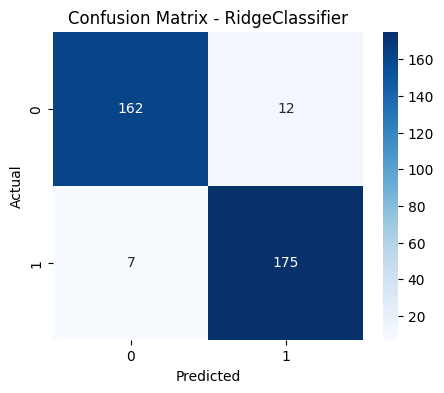

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.98      0.99      0.99       182

    accuracy                           0.99       356
   macro avg       0.99      0.99      0.99       356
weighted avg       0.99      0.99      0.99       356

Confusion Matrix:
 [[171   3]
 [  1 181]]


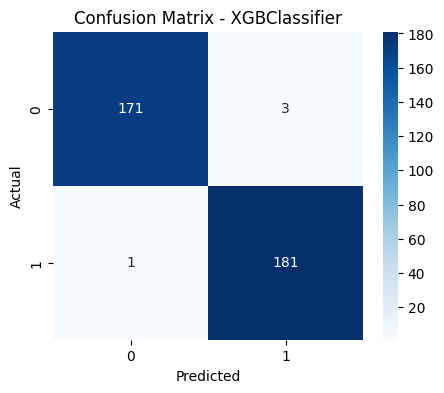

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       174
           1       0.99      0.99      0.99       182

    accuracy                           0.99       356
   macro avg       0.99      0.99      0.99       356
weighted avg       0.99      0.99      0.99       356

Confusion Matrix:
 [[172   2]
 [  1 181]]


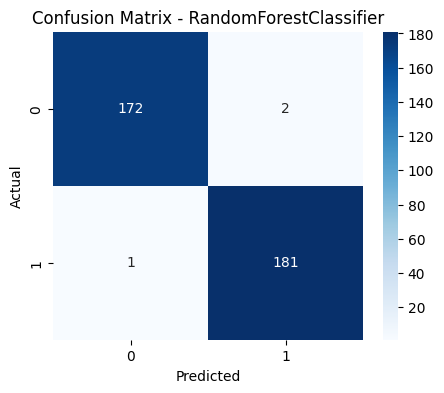

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       174
           1       0.96      0.98      0.97       182

    accuracy                           0.97       356
   macro avg       0.97      0.97      0.97       356
weighted avg       0.97      0.97      0.97       356

Confusion Matrix:
 [[167   7]
 [  4 178]]


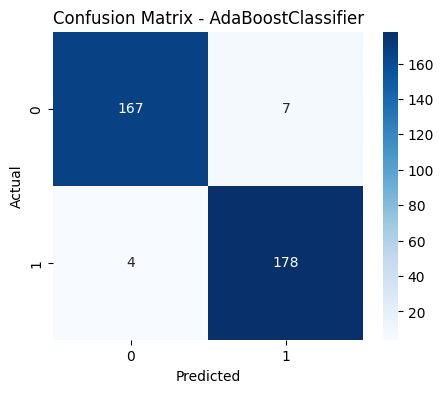

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.98      0.99      0.99       182

    accuracy                           0.99       356
   macro avg       0.99      0.99      0.99       356
weighted avg       0.99      0.99      0.99       356

Confusion Matrix:
 [[170   4]
 [  1 181]]


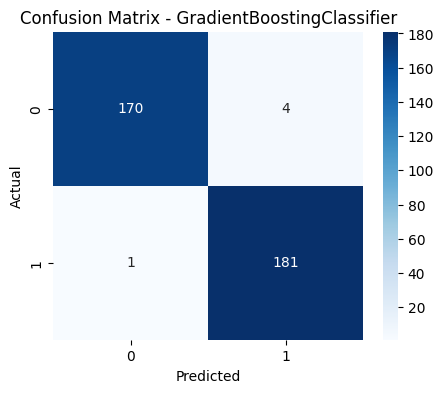

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       174
           1       0.99      0.97      0.98       182

    accuracy                           0.98       356
   macro avg       0.98      0.98      0.98       356
weighted avg       0.98      0.98      0.98       356

Confusion Matrix:
 [[172   2]
 [  5 177]]


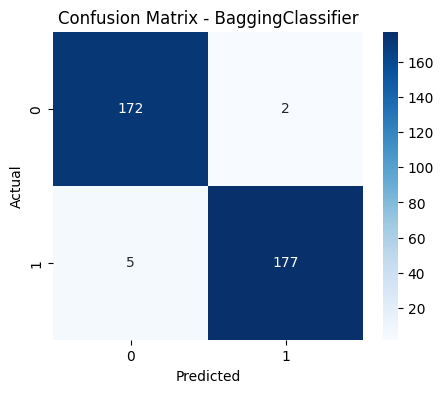

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       174
           1       0.98      0.95      0.96       182

    accuracy                           0.96       356
   macro avg       0.96      0.96      0.96       356
weighted avg       0.96      0.96      0.96       356

Confusion Matrix:
 [[170   4]
 [ 10 172]]


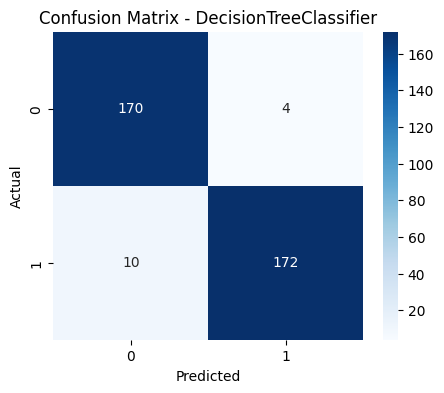

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       174
           1       0.88      0.87      0.88       182

    accuracy                           0.88       356
   macro avg       0.88      0.88      0.88       356
weighted avg       0.88      0.88      0.88       356

Confusion Matrix:
 [[153  21]
 [ 23 159]]


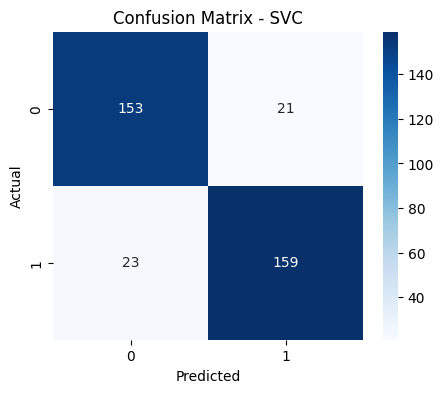

In [46]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()